In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/Suicide_Detection.csv')

In [ ]:
dataset.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


Data Preprocessing

In [ ]:
dataset.shape

(232074, 3)

In [ ]:
# reducing the dataset to decrease complexity
df = dataset.sample(n=10000, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 74414 to 224640
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [ ]:
df.describe()

,text,class
count,10000,10000
unique,9999,2
top,join sub aight basic im make sub call rcovidme...,non-suicide
freq,2,5048


In [ ]:
df['Unnamed: 0'].is_unique

True

In [ ]:
df.drop(columns = 'Unnamed: 0',inplace=True)

In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

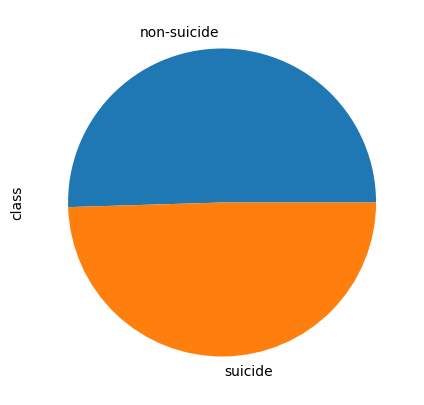

In [ ]:
plt.figure(figsize=(10,5))
df['class'].value_counts().plot(kind='pie',x='text',y='class')
plt.show()

In [ ]:
df["class"].value_counts()


non-suicide    5048
suicide        4952
Name: class, dtype: int64

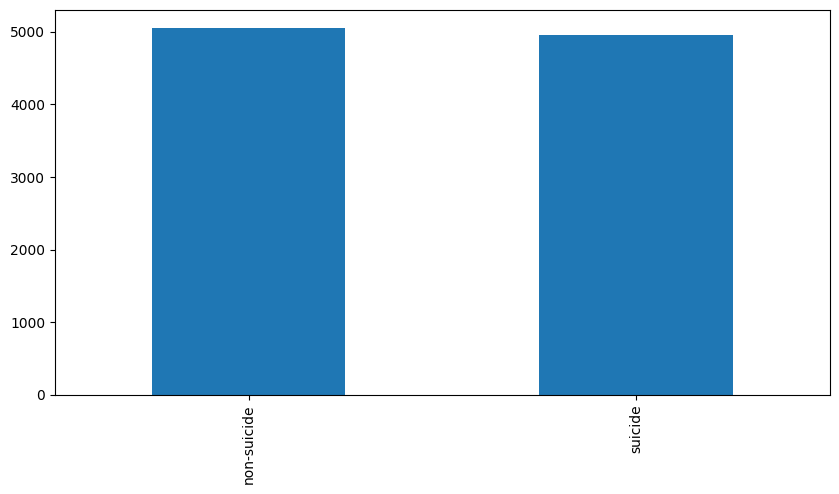

In [ ]:
plt.figure(figsize=(10,5))
df['class'].value_counts().plot(kind='bar',x='text',y='label')
plt.show()

Text Preprocessing

In [ ]:
# lowercase
df['text']= df['text'].str.lower()

In [ ]:
# remove punctuations
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [ ]:
import nltk
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stop word removal

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenization
df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))

In [ ]:
# stemming
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])

In [ ]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

In [ ]:
df.head()

,text,class
74414,dont know7 month self harm free urg get strong...,suicide
149516,start becom rich start compani becom 16 afford...,non-suicide
12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
14043,ive honestli got idea anymoreit feel everyon f...,suicide
30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [ ]:
ind = df[df['text'].isnull()].index

In [ ]:
df.iloc[ind]

,text,class


In [ ]:
# 'text' column contains None values as it may contain puctuations or emojies, So drop that rows
df.dropna(inplace=True)

models

In [ ]:
x,y = df['text'],df['class']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [ ]:
X_train.shape,X_test.shape

((7000, 1320), (3000, 1320))

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

Accuracy: 0.9093333333333333
              precision    recall  f1-score   support

 non-suicide       0.90      0.93      0.91      1524
     suicide       0.92      0.89      0.91      1476

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



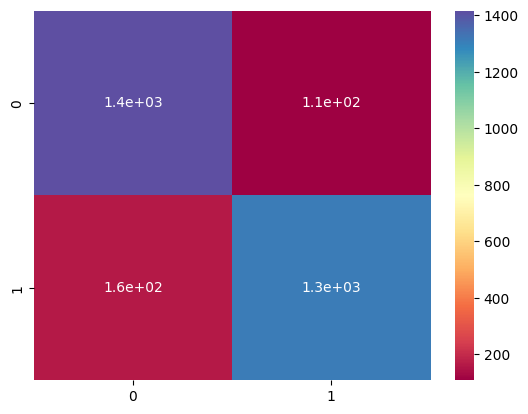

In [ ]:
# Logistic Regression

LRclassifier = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRclassifier.fit(X_train, y_train)
y_pred = LRclassifier.predict(X_test)
y_act=y_test
print("Accuracy: "+str(accuracy_score(y_act,y_pred)))
print(classification_report(y_act, y_pred))
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')

x = accuracy_score(y_act,y_pred)
acc.append(x)
model.append('Logistic Regression')

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

Accuracy: 0.777
              precision    recall  f1-score   support

 non-suicide       0.74      0.87      0.80      1524
     suicide       0.83      0.68      0.75      1476

    accuracy                           0.78      3000
   macro avg       0.79      0.78      0.77      3000
weighted avg       0.79      0.78      0.77      3000

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=4,
                       n_estimators=5)


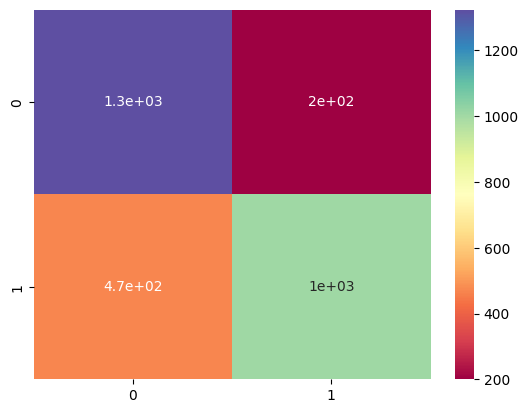

In [ ]:
# Random Forest

RFclassifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
RFclassifiers.fit(X_train, y_train)

y_act=y_test
y_pred=RFclassifiers.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_act,y_pred)))
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

print(RFclassifiers.best_estimator_)

x = accuracy_score(y_act,y_pred)
acc.append(x)
model.append('Random Forest')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

 non-suicide       0.75      0.80      0.77      1524
     suicide       0.77      0.72      0.75      1476

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000



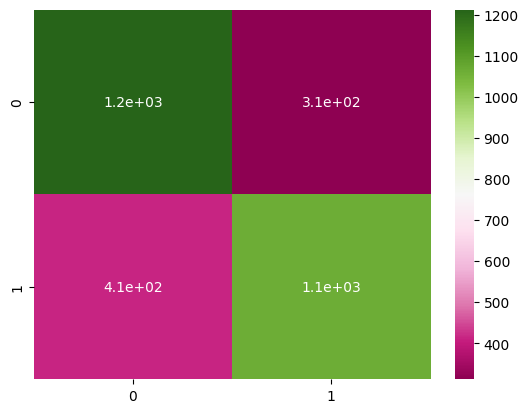

In [ ]:
# Decision Tree

Decisionclf = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
Decisionclf.fit(X_train, y_train)

y_act=y_test
y_pred=Decisionclf.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_act,y_pred)))
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

x = accuracy_score(y_act,y_pred)
acc.append(x)
model.append('Decision Tree')

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

 non-suicide       0.88      0.88      0.88      1524
     suicide       0.88      0.87      0.88      1476

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



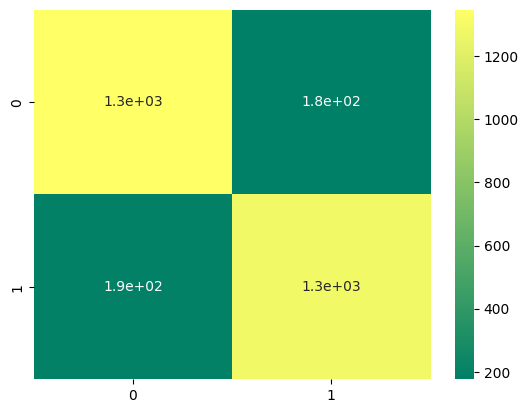

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)

y_act=y_test
print("Accuracy: "+str(accuracy_score(y_act,y_pred)))
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

x = accuracy_score(y_act,y_pred)
acc.append(x)
model.append('Naive Bayes')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XG boost
clf= XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)
clf.fit(X_train,y_train.replace({"non-suicide":0,'suicide':1}))
print('Accuracy:',clf.score(X_test,y_test.replace({"non-suicide":0,'suicide':1})))

Accuracy: 0.8526666666666667


Accuracy: 0.8526666666666667
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1524
           1       0.85      0.85      0.85      1476

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



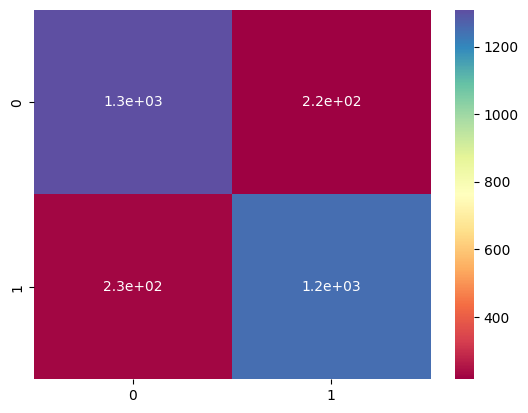

In [ ]:
#confusion matrix and classification report
y_act = y_test.replace({"non-suicide":0,'suicide':1})
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_act,y_pred) )
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))


x = accuracy_score(y_act,y_pred)
acc.append(x)
model.append('XG boost')

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

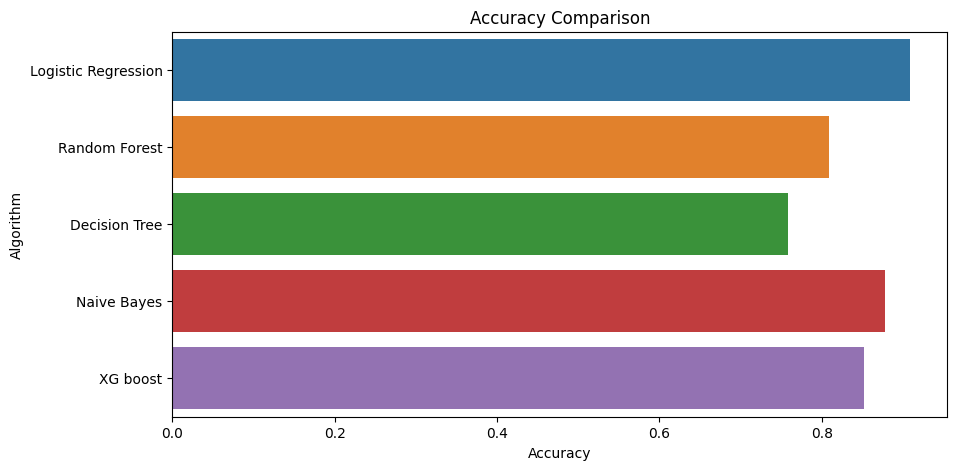

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model)

In [ ]:
def preprocess(inp):
    inp = inp.lower() #convert to lower case
    inp = inp.replace(r'[^\w\s]+', '') #remove punctuations
    inp = [word for word in inp.split() if word not in (stop_words)] #tokenize the sentence
    inp = ' '.join([ps.stem(i) for i in inp]) #stemming
    inputToModel = vectorizer.transform([inp]).toarray() #transform to vector form
    return inputToModel

In [ ]:
input=preprocess('life is not so good')
predict = VotingClassifiers.predict(input) #Model prediction
print('Output : ', predict[0])

Output :  non-suicide


In [ ]:
input=preprocess('I want to die')
predict = VotingClassifiers.predict(input)
print('Output : ', predict[0])

Output :  suicide


In [ ]:
input=preprocess('I do not want to live')
predict = LRclassifier.predict(input)
print('Output : ', predict[0])

Output :  suicide
